In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def read_data(csv_path):    
    
    ### Loop the data lines
    with open(csv_path, 'r') as temp_f:
    # get No of columns in each line
        col = [ len(l.split(",")) for l in temp_f.readlines() ]

    ### Generate column names  (names will be Values1, Values2, ... for the trailing 'Tunnel Profile' values)
    column_names = ['Snapshot', 'Tunnel cluster', 'Tunnel', 'Throughput', 'Cost', 'Bottleneck radius', 'Ave R error', 'Max R error', 'Bott R error', 'Curvature', 'Length', ' ', 'Axis']
    for i in range(13, max(col)):
        column_names.append("Values" + str(i-12))

    ### Read csv
    df = pd.read_csv(csv_path, header=None, delimiter=",", names=column_names, skiprows=1, low_memory=False)

    # Drop unecessary columns
    keep_cols = ['Tunnel cluster', 'Snapshot', 'Axis']
    for i in range(13, max(col)):
        keep_cols.append("Values" + str(i-12))

    return df[keep_cols]


def extract_rad_len(df, tun_cl):
    
    df = df[df['Tunnel cluster'] == tun_cl].drop(columns=['Tunnel cluster'])

    df_len = df[df['Axis'] == ' length'].drop(columns=['Axis']).set_index('Snapshot').stack().reset_index(level=0).rename(columns={0:'Tunnel length'}).set_index('Snapshot')
    df_rad = df[df['Axis'] == ' R'].drop(columns=['Axis']).set_index('Snapshot').stack().reset_index(level=0).rename(columns={0:'Tunnel radius'}).set_index('Snapshot')

    df_rad_len = pd.concat([df_rad, df_len], axis=1).dropna().reset_index(level=0)

    snapshot_list = []
    for i in range(20, 2501, 20):
        snapshot_list.append(str(i)+".pdb")

    df_skip = df_rad_len[df_rad_len['Snapshot'].isin(snapshot_list)]

    return df_skip.astype({'Tunnel radius': 'float64', 'Tunnel length': 'float64'})


In [18]:
df_6agf_1 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6AGF_WTR_rep_1/out/analysis/tunnel_profiles.csv")
df_6agf_2 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6AGF_WTR_rep_2/out/analysis/tunnel_profiles.csv")
df_6agf_3 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6AGF_WTR_rep_3/out/analysis/tunnel_profiles.csv")

In [21]:
df_6agf_1_f1 = extract_rad_len(df_6agf_1, 1)
df_6agf_1_f2 = extract_rad_len(df_6agf_1, 2)
df_6agf_1_f3 = extract_rad_len(df_6agf_1, 5)
df_6agf_1_f4 = extract_rad_len(df_6agf_1, 6)

df_6agf_2_f1 = extract_rad_len(df_6agf_2, 1)
df_6agf_2_f2 = extract_rad_len(df_6agf_2, 2)
df_6agf_2_f3 = extract_rad_len(df_6agf_2, 3)
df_6agf_2_f4 = extract_rad_len(df_6agf_2, 6)

df_6agf_3_f1 = extract_rad_len(df_6agf_3, 2)
df_6agf_3_f2 = extract_rad_len(df_6agf_3, 1)
df_6agf_3_f3 = extract_rad_len(df_6agf_3, 3)
df_6agf_3_f4 = extract_rad_len(df_6agf_3, 6)

Text(0.5,1,'6AGF:D1-2 (rep1)')

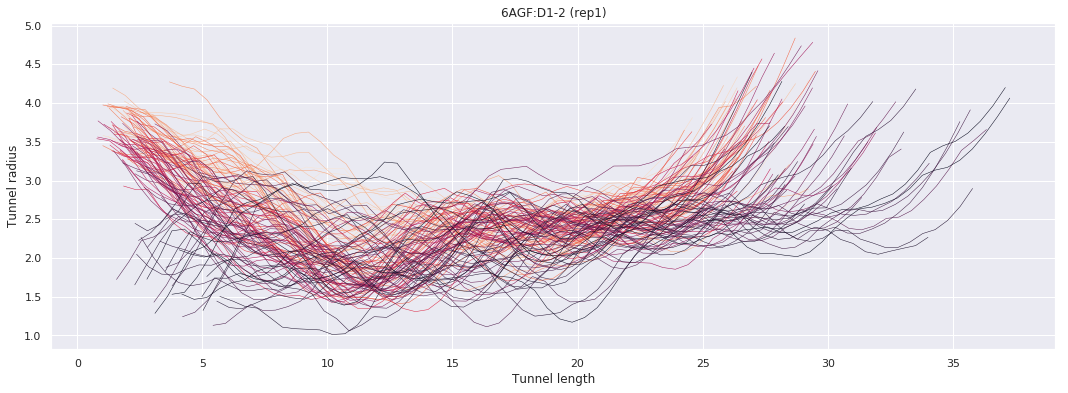

In [23]:
# config plot visuals
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_context("notebook", rc={"lines.linewidth": .5})

sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6agf_1_f1, legend=False)
plt.title("6AGF:D1-2 (rep1)")

Text(0.5,1,'6AGF:D1-4 (rep1)')

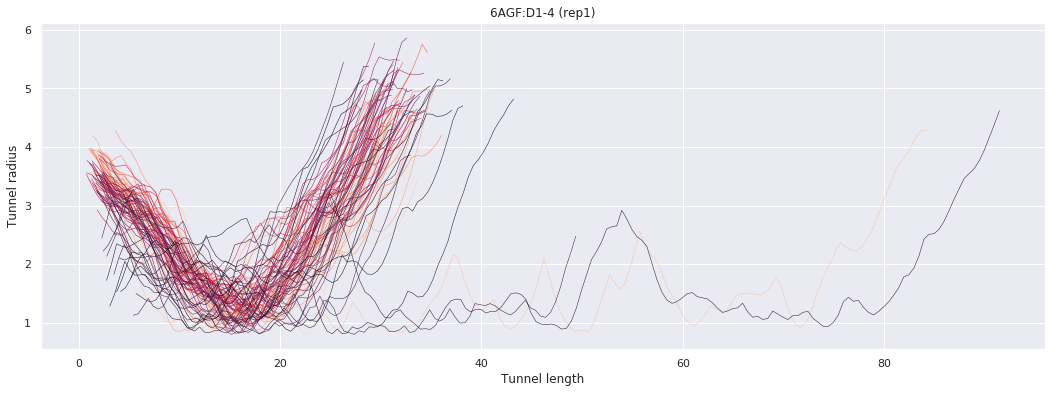

In [24]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6agf_1_f4, legend=False)
plt.title("6AGF:D1-4 (rep1)")

Text(0.5,1,'6AGF:D1-4 (rep2)')

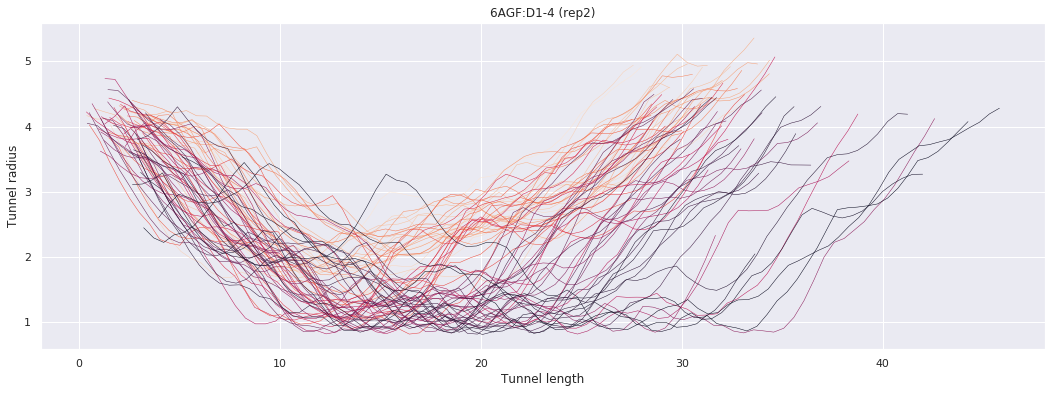

In [25]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6agf_2_f4, legend=False)
plt.title("6AGF:D1-4 (rep2)")

Text(0.5,1,'6AGF:D1-4 (rep3)')

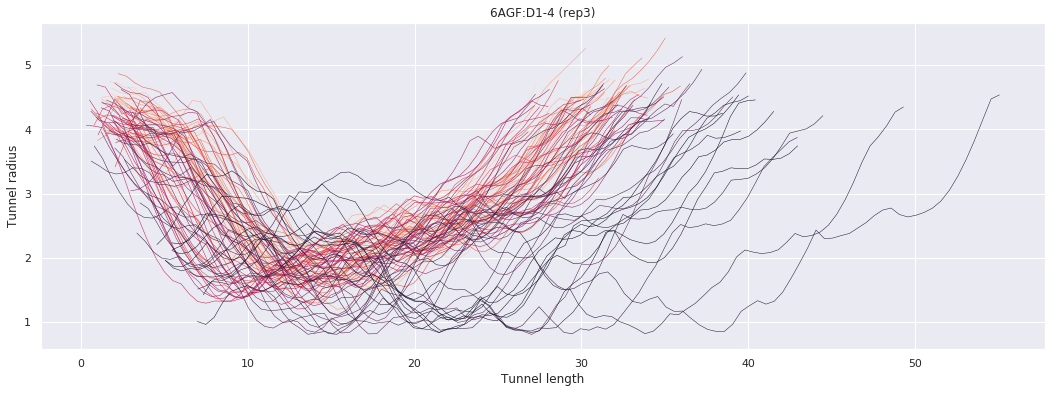

In [26]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6agf_3_f4, legend=False)
plt.title("6AGF:D1-4 (rep3)")

In [27]:
df_6j8e_1 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8E_WTR_rep_1/out/analysis/tunnel_profiles.csv")
df_6j8e_2 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8E_WTR_rep_2/out/analysis/tunnel_profiles.csv")
df_6j8e_3 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8E_WTR_rep_3/out/analysis/tunnel_profiles.csv")

In [28]:
df_6j8e_1_f1 = extract_rad_len(df_6j8e_1, 2)
df_6j8e_1_f2 = extract_rad_len(df_6j8e_1, 3)
df_6j8e_1_f3 = extract_rad_len(df_6j8e_1, 4)
df_6j8e_1_f4 = extract_rad_len(df_6j8e_1, 1)

df_6j8e_2_f1 = extract_rad_len(df_6j8e_2, 1)
df_6j8e_2_f2 = extract_rad_len(df_6j8e_2, 3)
df_6j8e_2_f3 = extract_rad_len(df_6j8e_2, 2)
df_6j8e_2_f4 = extract_rad_len(df_6j8e_2, 6)

df_6j8e_3_f1 = extract_rad_len(df_6j8e_3, 3)
df_6j8e_3_f2 = extract_rad_len(df_6j8e_3, 4)
df_6j8e_3_f3 = extract_rad_len(df_6j8e_3, 2)
df_6j8e_3_f4 = extract_rad_len(df_6j8e_3, 1)

Text(0.5,1,'6J8E:D1-4 (rep1)')

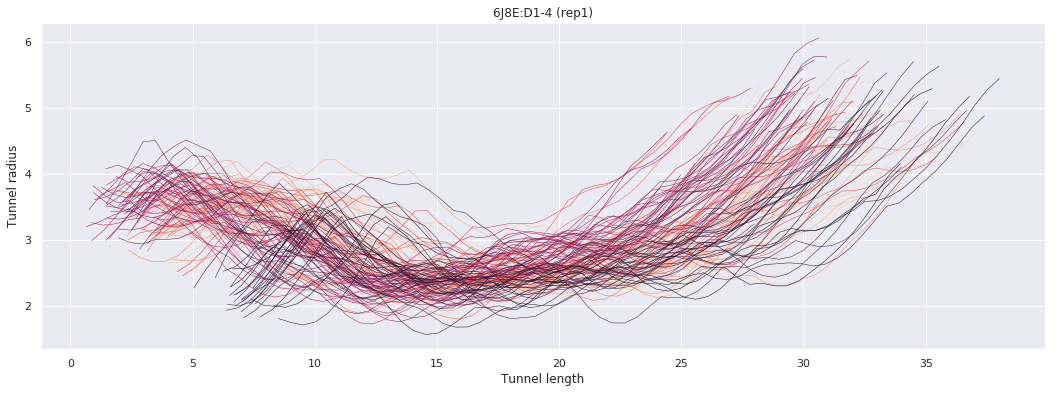

In [29]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6j8e_1_f4, legend=False)
plt.title("6J8E:D1-4 (rep1)")

Text(0.5,1,'6J8E:D1-4 (rep2)')

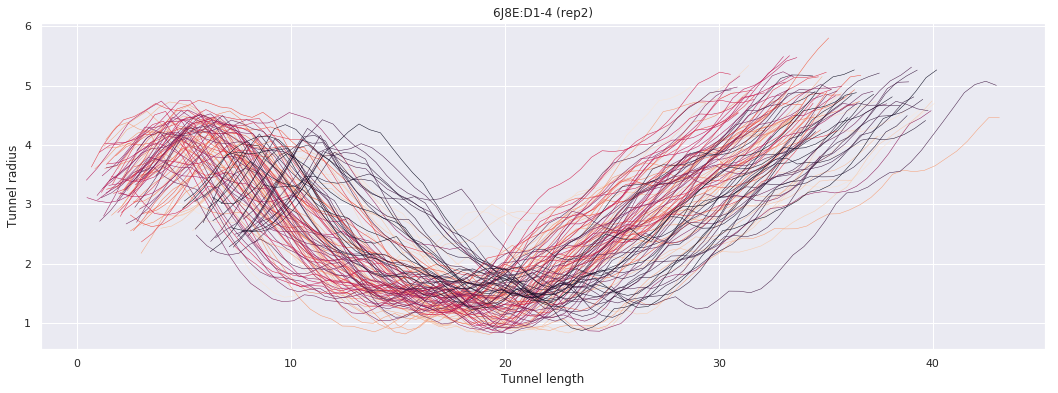

In [30]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6j8e_2_f4, legend=False)
plt.title("6J8E:D1-4 (rep2)")

Text(0.5,1,'6J8E:D1-4 (rep3)')

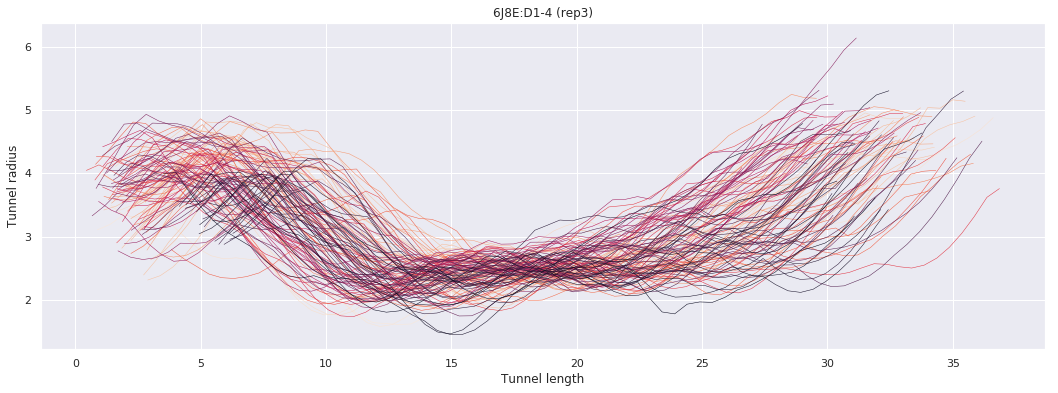

In [31]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6j8e_3_f4, legend=False)
plt.title("6J8E:D1-4 (rep3)")

In [32]:
df_6uzr_1 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZR_WTR_rep_1/out/analysis/tunnel_profiles.csv")
df_6uzr_2 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZR_WTR_rep_2/out/analysis/tunnel_profiles.csv")
df_6uzr_3 = read_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZR_WTR_rep_3/out/analysis/tunnel_profiles.csv")

In [33]:
df_6uzr_1_f1 = extract_rad_len(df_6uzr_1, 1)
df_6uzr_1_f2 = extract_rad_len(df_6uzr_1, 3)
df_6uzr_1_f3 = extract_rad_len(df_6uzr_1, 2)
df_6uzr_1_f4 = extract_rad_len(df_6uzr_1, 5)

df_6uzr_2_f1 = extract_rad_len(df_6uzr_2, 2)
df_6uzr_2_f2 = extract_rad_len(df_6uzr_2, 1)
df_6uzr_2_f3 = extract_rad_len(df_6uzr_2, 3)
df_6uzr_2_f4 = extract_rad_len(df_6uzr_2, 5)

df_6uzr_3_f1 = extract_rad_len(df_6uzr_3, 1)
df_6uzr_3_f2 = extract_rad_len(df_6uzr_3, 4)
df_6uzr_3_f3 = extract_rad_len(df_6uzr_3, 2)
df_6uzr_3_f4 = extract_rad_len(df_6uzr_3, 5)


Text(0.5,1,'6UZR:D2-3 (rep1)')

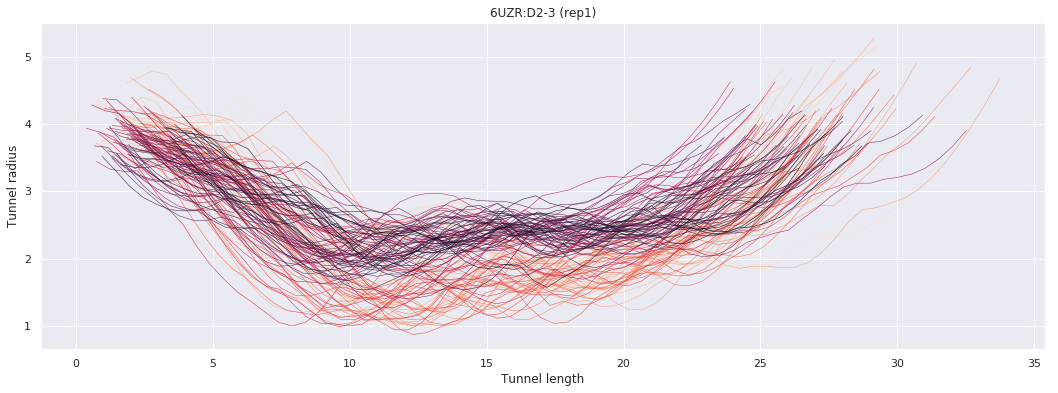

In [34]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6uzr_1_f2, legend=False)
plt.title("6UZR:D2-3 (rep1)")

Text(0.5,1,'6UZR:D2-3 (rep2)')

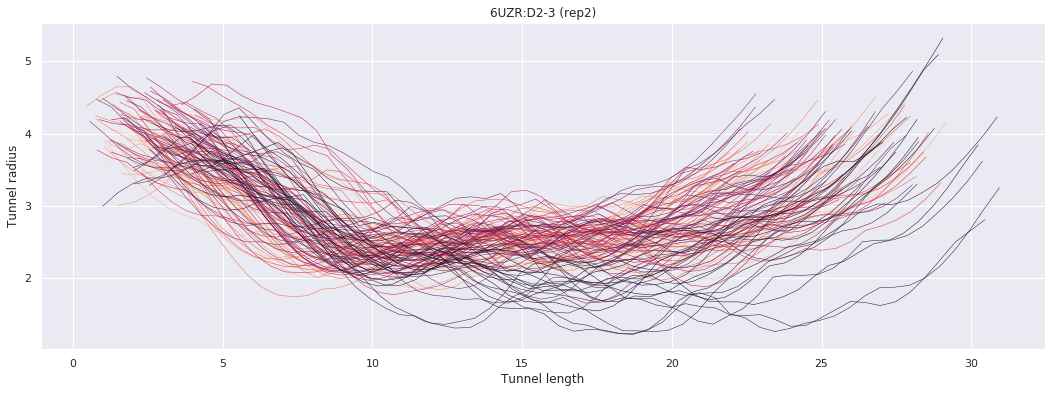

In [35]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6uzr_2_f2, legend=False)
plt.title("6UZR:D2-3 (rep2)")

Text(0.5,1,'6UZR:D2-3 (rep3)')

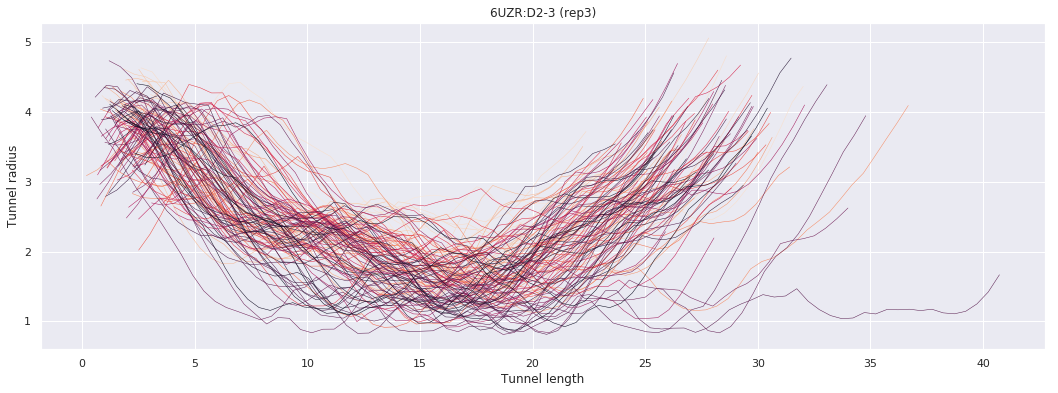

In [36]:
sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df_6uzr_3_f2, legend=False)
plt.title("6UZR:D2-3 (rep3)")